In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter


In [3]:
# Read the CSV file
df_credit = pd.read_csv("/Users/Tohya/Documents/VS_code_outputs/virt/Credit_risk/german_credit_data.csv", index_col=0)

# Display the first few rows of the data
print(df_credit.info())
print(df_credit.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None
Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


In [18]:
import seaborn as sns
import pandas as pd
import plotly.offline as py
import matplotlib.pyplot as plt

df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age']
df_bad = df_credit[df_credit["Risk"] =='bad']['Age']

plt.figure(figsize=(10, 6))
sns.histplot(df_good, kde=True, label='Good Credit')
sns.histplot(df_bad, kde=True, label='Bad Credit')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Age Distribution of Good and Bad Credits')
plt.legend()
plt.show()



TypeError: set_theme() got an unexpected keyword argument 'use_inf_as_na'

In [5]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

/var/folders/fl/vtht_j7j6dqfpc3lzlwjsxm80000gp/T/ipykernel_47426/1720506284.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Credit amount', ylabel='Density'>

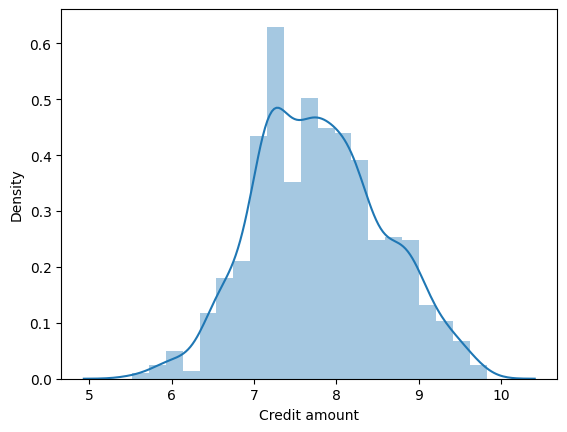

In [6]:
import seaborn as sns
import numpy as np
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])
sns.distplot(df_credit['Credit amount'])

In [7]:
def binary_encoder(df, nan_as_category=False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    df[new_columns] = df[new_columns].astype('int8')  # Convert to binary datatype
    return df, new_columns

In [8]:
df_credit, _ = binary_encoder(df_credit)
df_credit.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,67,2,7.063904,6,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,22,2,8.691315,48,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
2,49,1,7.647786,12,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,45,2,8.972337,42,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,53,2,8.490849,24,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [9]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats).cat.codes

In [10]:
df_credit = df_credit.drop(df_credit.columns[df_credit.columns.str.endswith('_nan')], axis=1)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   int64  
 1   Job                          1000 non-null   int64  
 2   Credit amount                1000 non-null   float64
 3   Duration                     1000 non-null   int64  
 4   Sex_female                   1000 non-null   int8   
 5   Sex_male                     1000 non-null   int8   
 6   Housing_free                 1000 non-null   int8   
 7   Housing_own                  1000 non-null   int8   
 8   Housing_rent                 1000 non-null   int8   
 9   Saving accounts_little       1000 non-null   int8   
 10  Saving accounts_moderate     1000 non-null   int8   
 11  Saving accounts_quite rich   1000 non-null   int8   
 12  Saving accounts_rich         1000 non-null   int8   
 13  Checking account_little 

In [11]:
# Excluding an 'unfair' features 
cols_to_drop = ['Sex_female', 'Sex_male', 'Age','Risk_bad']
for col in cols_to_drop:
    df_credit = df_credit.drop([col], axis=1)

df_credit.to_csv("/Users/Tohya/Documents/VS_code_outputs/virt/Credit_risk/german_credit_data_cleaned.csv")

Correlation

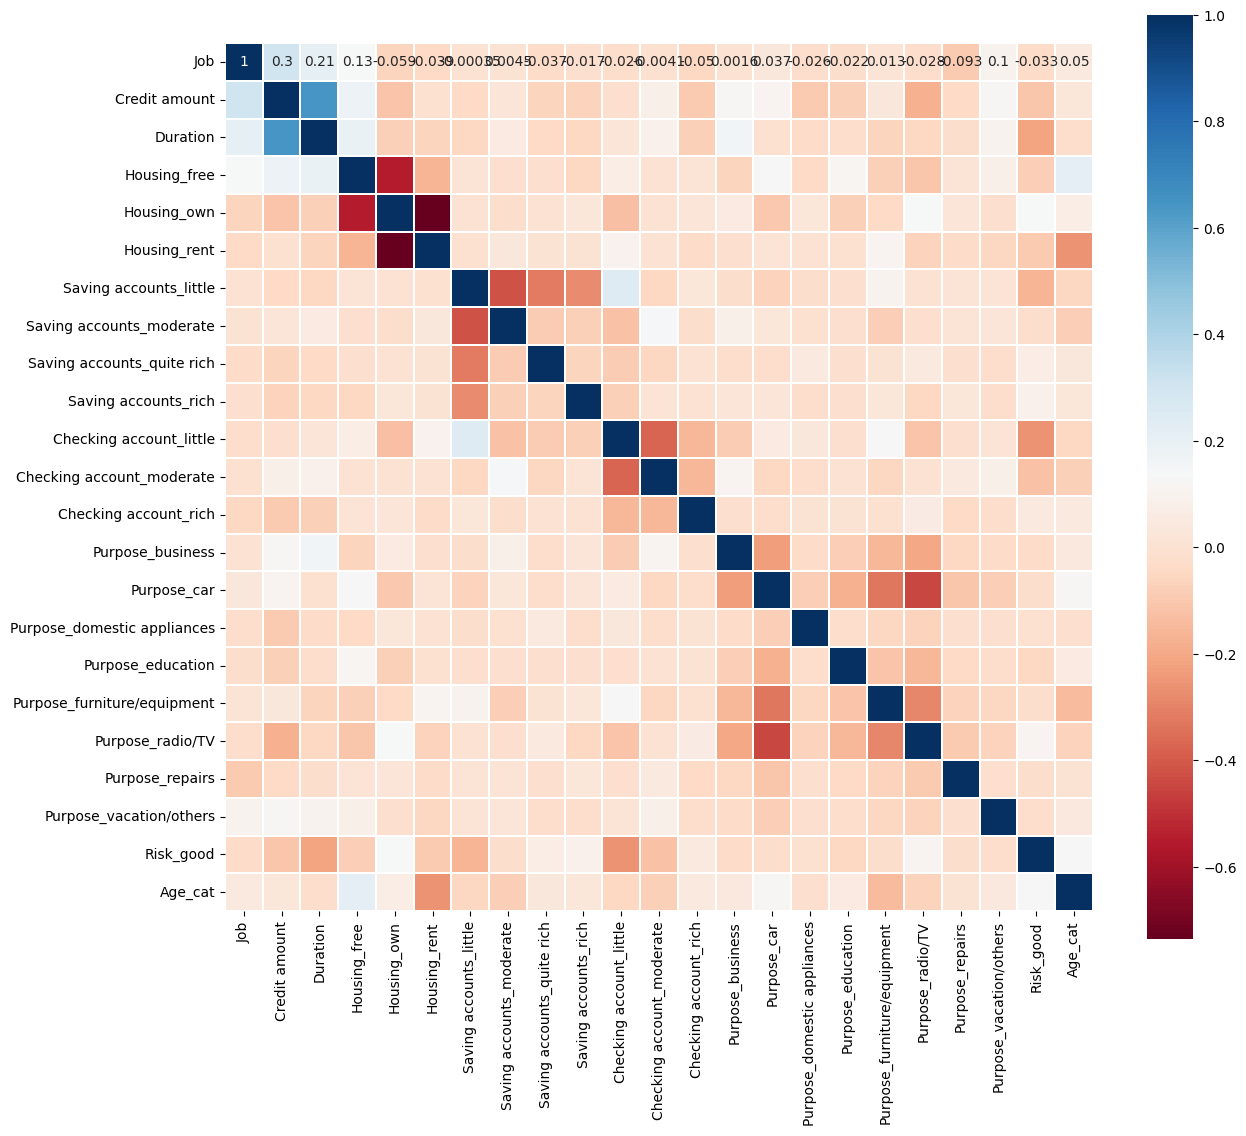

In [12]:
df_credit_numeric = df_credit.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(14,12))
sns.heatmap(df_credit_numeric.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [14]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [15]:
X = df_credit.drop('Risk_good', axis=1).values
y = df_credit["Risk_good"].values

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR: 0.894197 (0.025650)
LDA: 0.880100 (0.023424)
KNN: 0.903174 (0.031509)
CART: 0.740193 (0.039003)
NB: 0.720855 (0.042103)
RF: 0.874863 (0.020023)
SVM: 0.957844 (0.029325)
XGB: 0.823273 (0.021716)


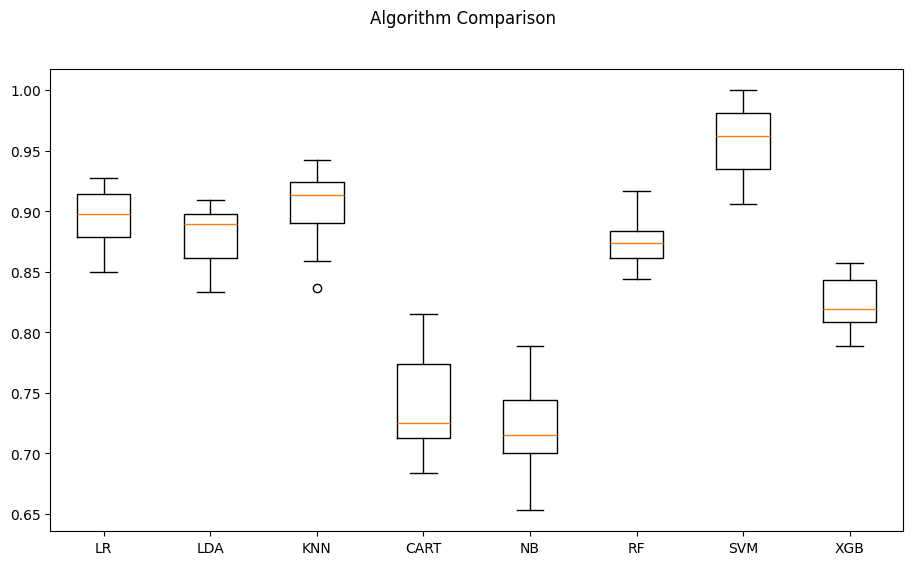

In [16]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn using cross validation
results = []
names = []
scoring = 'recall'

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())   
    print(msg)
        
# # boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Assuming you have your features and target variable in X and y respectively
svm = SVC(gamma='auto')
rf_model = RandomForestClassifier()
lda_model = LinearDiscriminantAnalysis()
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()  

models = [svm, rf_model, lda_model, lr_model, knn_model]

# Perform 10-fold cross-validation
for model in models:
    accuracy_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print("Accuracy per fold: ", accuracy_scores)
    print("Average accuracy: ", accuracy_scores.mean())
    print("Standard deviation: ", accuracy_scores.std())

Accuracy per fold:  [0.75 0.69 0.71 0.69 0.73 0.7  0.64 0.72 0.73 0.71]
Average accuracy:  0.707
Standard deviation:  0.028653097563788806
Accuracy per fold:  [0.78 0.65 0.73 0.74 0.69 0.73 0.69 0.82 0.75 0.81]
Average accuracy:  0.7390000000000001
Standard deviation:  0.05127377497317708
Accuracy per fold:  [0.79 0.74 0.66 0.71 0.75 0.77 0.67 0.83 0.74 0.71]
Average accuracy:  0.737
Standard deviation:  0.049608467019249834


/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Accuracy per fold:  [0.8  0.74 0.68 0.72 0.74 0.78 0.69 0.81 0.71 0.69]
Average accuracy:  0.736
Standard deviation:  0.044542114902640206
Accuracy per fold:  [0.73 0.68 0.69 0.64 0.66 0.76 0.66 0.77 0.71 0.65]
Average accuracy:  0.6950000000000001
Standard deviation:  0.04364630568559038


Let's evaluate the accuracy of LDA, KNN, RF, and SVM models

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



def train_and_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Train and predict using SVM
svm_model = SVC(gamma='auto')
rf_model = RandomForestClassifier()
lda_model = LinearDiscriminantAnalysis()
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()  
models = [svm_model, rf_model, lda_model, lr_model, knn_model]
for model in models:
    print("%s: %f" % (model, train_and_predict(model, X_train, y_train, X_test, y_test)))


SVC(gamma='auto'): 0.695000
RandomForestClassifier(): 0.730000
LinearDiscriminantAnalysis(): 0.745000
LogisticRegression(): 0.740000
KNeighborsClassifier(): 0.690000


/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Let's tune for logistic regresion and LDAs hyperparameters.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

param_grid_lr = [
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'max_iter': [200, 300, 400]
    },
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'penalty': ['l2'],
        'max_iter': [200, 300, 400]
    },
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['saga'],
        'penalty': ['l1', 'l2'],
        'max_iter': [200, 300, 400]
    }
]

grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, verbose=1, n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)

print(grid_lr.best_params_)
print(grid_lr.best_score_)


Fitting 5 folds for each of 147 candidates, totalling 735 fits
{'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
0.7413333333333332


/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

In [31]:
param_grid_lda = [
    {
        'solver': ['svd']  # 'svd' does not rely on covariance matrix inversion
    },
    {
        'solver': ['lsqr'],  # 'lsqr' can use shrinkage
        'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
    }
]

grid_lda = GridSearchCV(LinearDiscriminantAnalysis(), param_grid_lda, cv=5, n_jobs=-1)
grid_lda.fit(X_train, y_train)

print("Best Parameters for LDA:", grid_lda.best_params_)
print("Best Score for LDA:", grid_lda.best_score_)

Best Parameters for LDA: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best Score for LDA: 0.7373333333333333


In [33]:
from sklearn.ensemble import StackingClassifier

# Base models
base_learners = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True))
]

# Meta-learner
meta_learner = LogisticRegression()

# Stacking ensemble model
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Fit the model
stacking_clf.fit(X_train, y_train)

# Evaluate the model
stacking_accuracy = stacking_clf.score(X_test, y_test)
print(f"Stacking Ensemble Accuracy: {stacking_accuracy}")



/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Tohya/Documents/VS_code_outputs/virt/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Stacking Ensemble Accuracy: 0.744


In [1]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Define a function to plot the confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Define a function to plot the ROC curve
def plot_roc_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    print(model)
    plot_confusion_matrix(model, X_test, y_test)

NameError: name 'models' is not defined